In [88]:
%matplotlib inline

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
# from ipywidgets import interact

In [90]:
# Reading filtered Michigan daata

michigan = pd.read_csv("MichiganSamsha.csv")
distribution = pd.read_csv("MentalHealthHospitals.csv")

# print(michigan.columns)

In [91]:
michigan.columns

michigan.head()

,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SMISEDSUD,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,...,OPRACEPERUNK,OPLEGALTOTVOL,OPLEGALPERVOL,OPLEGALTOTNONFOREN,OPLEGALPERNONFOREN,OPLEGALTOTFOREN,OPLEGALPERFOREN,COD_PCT,TOTADMIS,PERCENTVA
0,202005339,MI,1,1,1,1,0,0,0,1,...,-2,-2,-2,-2,-2,-2,-2,0,1,0
1,202005340,MI,1,1,1,1,1,1,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
2,202005341,MI,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,-2,9,0
3,202005342,MI,1,1,1,0,0,1,1,0,...,-2,9,-2,0,-2,0,-2,0,9,1
4,202005343,MI,1,1,1,1,1,0,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [92]:
# Keeping facilitytype, lst , caseID columns
miFacilities = michigan[['CASEID','LST','FACILITYTYPE', 'FOCUS','OWNERSHP','PUBLICAGENCY','PAYASST','REVCHK1','REVCHK2','REVCHK8','REVCHK5',
                         'REVCHK10','FUNDSMHA','FUNDSTATEWELFARE','FUNDSTATEJUV','FUNDSTATEEDUC','FUNDOTHSTATE','FUNDLOCALGOV','FUNDCSBG',
                         'FUNDCMHG','FUNDFEDGRANT','REVCHK15','FUNDVA','REVCHK17','FUNDPRIVCOMM','REVCHK2A','TREATPSYCHOTHRPY','TREATFAMTHRPY',
                         'TREATGRPTHRPY','TREATCOGTHRPY','TREATDIALTHRPY','TREATCOGREM','TREATBEHAVMOD','TREATDUALMHSA','TREATTRAUMATHRPY','TREATACTVTYTHRPY',
                         'TREATELECTRO','TREATTMS','TREATTELEMEDINCE','TREATOTH','ANTIPSYCH']]
# Renamed the in use data to miFacility
miFacilities.head()

,CASEID,LST,FACILITYTYPE,FOCUS,OWNERSHP,PUBLICAGENCY,PAYASST,REVCHK1,REVCHK2,REVCHK8,...,TREATCOGREM,TREATBEHAVMOD,TREATDUALMHSA,TREATTRAUMATHRPY,TREATACTVTYTHRPY,TREATELECTRO,TREATTMS,TREATTELEMEDINCE,TREATOTH,ANTIPSYCH
0,202005339,MI,4,4,3,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,202005340,MI,7,1,3,2,1,1,1,1,...,0,1,1,1,0,0,0,1,0,1
2,202005341,MI,7,1,3,3,1,0,1,1,...,0,1,1,1,0,0,0,1,0,1
3,202005342,MI,2,1,2,-2,0,1,1,1,...,0,1,0,0,1,0,0,1,0,1
4,202005343,MI,6,4,3,6,-2,0,0,0,...,0,0,1,1,0,0,0,1,0,1


In [93]:
# Creating a copy of the data set
miFacilities_copy = miFacilities.copy()

# Defining the mapping dictionary for facilities

facilty_mapping = {1:'Psychiatric hospital',
                   2: 'Separate inpatient psychiatric unit of a general hospital',
                   3: 'Residential treatment center for children',
                   4: 'Residential treatment center for adults',
                   5: 'Other type of residential treatment facility',
                   6: 'Veterans Administration Medical Center (VAMC)',
                   7: 'Community Mental Health Center (CMHC)',
                   8: 'Certified Community Behavioral Health Clinic (CCBHC)',
                   9: 'Partial hospitalization/day treatment facility',
                   10: 'Outpatient mental health facility',
                   11: 'Multi-setting mental health facility',
                   12: 'Other'}

# Renaming values in FACILTYTYPE column
miFacilities_copy['FACILITYTYPE'] = miFacilities_copy['FACILITYTYPE'].replace(facilty_mapping)


In [94]:
miFacilities_copy.head()

,CASEID,LST,FACILITYTYPE,FOCUS,OWNERSHP,PUBLICAGENCY,PAYASST,REVCHK1,REVCHK2,REVCHK8,...,TREATCOGREM,TREATBEHAVMOD,TREATDUALMHSA,TREATTRAUMATHRPY,TREATACTVTYTHRPY,TREATELECTRO,TREATTMS,TREATTELEMEDINCE,TREATOTH,ANTIPSYCH
0,202005339,MI,Residential treatment center for adults,4,3,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,202005340,MI,Community Mental Health Center (CMHC),1,3,2,1,1,1,1,...,0,1,1,1,0,0,0,1,0,1
2,202005341,MI,Community Mental Health Center (CMHC),1,3,3,1,0,1,1,...,0,1,1,1,0,0,0,1,0,1
3,202005342,MI,Separate inpatient psychiatric unit of a gener...,1,2,-2,0,1,1,1,...,0,1,0,0,1,0,0,1,0,1
4,202005343,MI,Veterans Administration Medical Center (VAMC),4,3,6,-2,0,0,0,...,0,0,1,1,0,0,0,1,0,1


In [95]:
# Mapping for facility focus
focus_mapping = {1:'Mental health treatment',
                 3: 'Mix of mental health and substance use treatment',
                 4: 'General health care',
                 5: 'Other service focus'}
# Renaming primary 'FOCUS' facility
miFacilities_copy['FOCUS'] = miFacilities_copy['FOCUS'].replace(focus_mapping)

In [96]:
# Mapping the organisations that run the facility
ownershp_mapping = {1: 'Private for-profit organization',
                    2: 'Private non-profit organization',
                    3: 'Public agency or department'}
# renaming 'OWNERSHP' column
miFacilities_copy['OWNERSHP'] = miFacilities_copy['OWNERSHP'].replace(ownershp_mapping)

In [97]:
# Mapping public agency ownership mapping
publicagency_mapping = {1: 'State mental health authority (SMHA)',
                        2: 'Other state government agency or department',
                        3: 'Regional/district authority or county, local, or municipal government',
                        4: 'Tribal government',
                        5: 'Indian Health Service',
                        6: 'Department of Veterans Affairs',
                        7: 'Other',
                        -2: 'Logical skip'}

# renaming 'PUBLICAGENCY' column
miFacilities_copy['PUBLICAGENCY'] = miFacilities_copy['PUBLICAGENCY'].replace(publicagency_mapping)

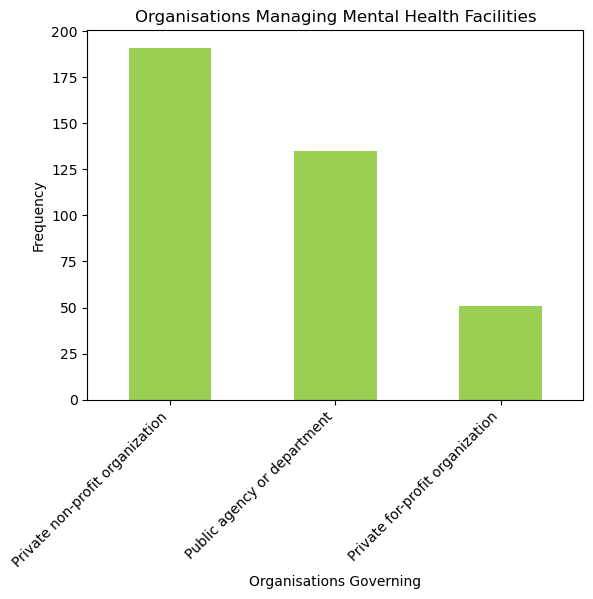

In [98]:
# Different Organisations that manage the facilities
ownershp_count = miFacilities_copy['OWNERSHP'].value_counts()

# descending values
ownershp_count = ownershp_count.sort_values(ascending=False)
# Creating a barplot
plt.figure()
ownershp_count.plot(kind='bar', color='#9BCF53')
plt.title('Organisations Managing Mental Health Facilities')
plt.xlabel('Organisations Governing')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Count numbers
# for index, value in enumerate(publicagency_count.sort_values(ascending=False)):
#     plt.text(index, value, str(value)) 
plt.show()

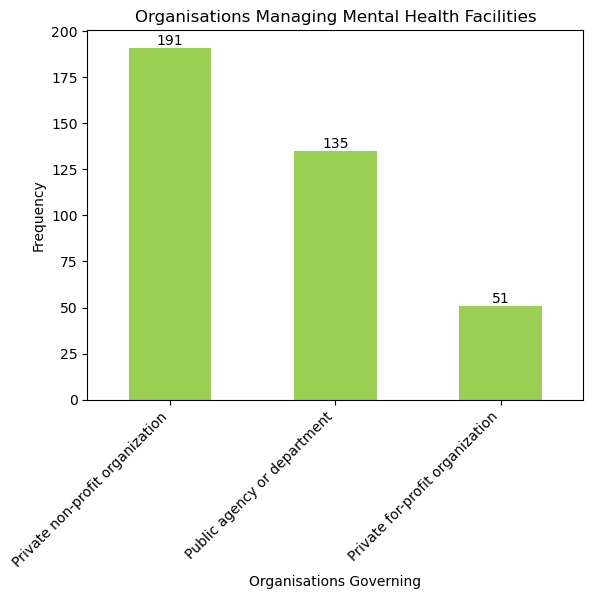

                                 Count  Percentage
OWNERSHP                                          
Private non-profit organization    191   50.663130
Public agency or department        135   35.809019
Private for-profit organization     51   13.527851


In [99]:
# Different Organisations that manage the facilities
ownership_count = miFacilities_copy['OWNERSHP'].value_counts()

# Calculate the total number of facilities
total_facilities = ownership_count.sum()

# Calculate the percentage for each ownership category
ownership_percentages = (ownership_count / total_facilities) * 100

# Sort ownership counts in descending order
ownership_count = ownership_count.sort_values(ascending=False)

# Create a bar plot
plt.figure()
ownership_count.plot(kind='bar', color='#9BCF53')
plt.title('Organisations Managing Mental Health Facilities')
plt.xlabel('Organisations Governing')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add count numbers above each bar
for index, value in enumerate(ownership_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

# Display the count and percentage for each ownership category
ownership_summary = pd.DataFrame({'Count': ownership_count, 'Percentage': ownership_percentages})
print(ownership_summary)


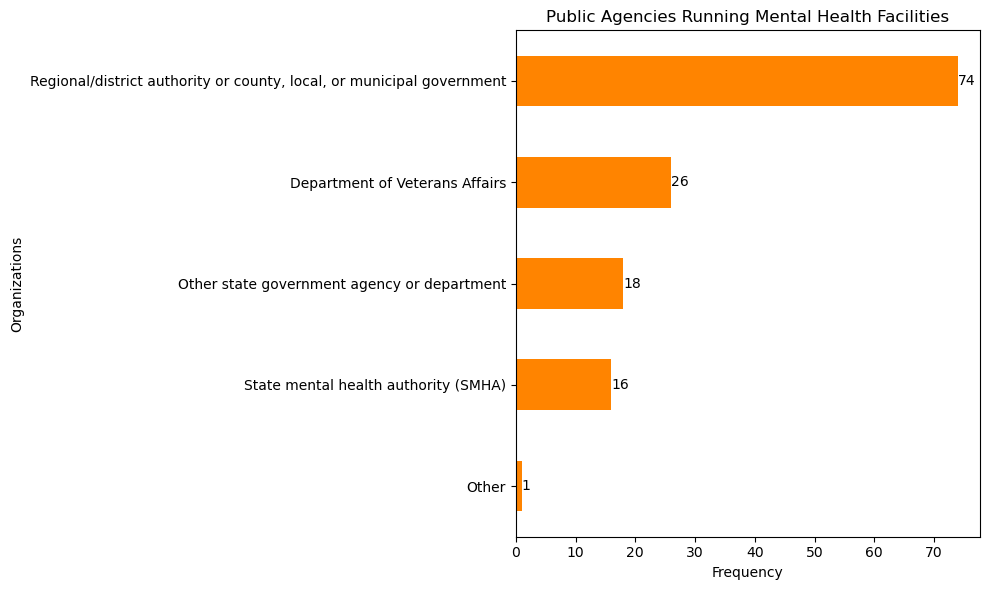

In [100]:
# Further analysis of different public agencies that facilitated mental health facilities
publicagency_count = miFacilities_copy['PUBLICAGENCY'].value_counts(ascending=True)

# Excluding 'logical skip' from the visualization
publicagency_count = publicagency_count.drop('Logical skip', errors='ignore')

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
publicagency_count.plot(kind='barh', color='#FF8400')
plt.title('Public Agencies Running Mental Health Facilities')
plt.xlabel('Frequency')
plt.ylabel('Organizations')

# Annotate the counts
for index, value in enumerate(publicagency_count.sort_values(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()


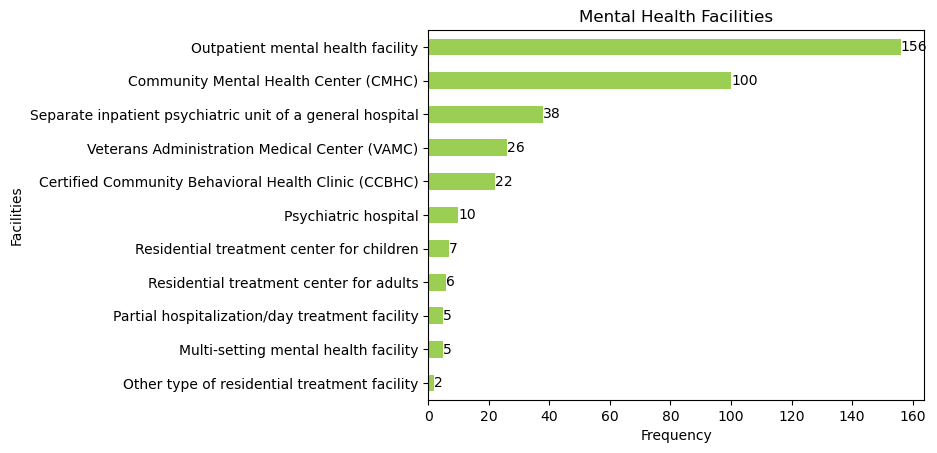

,Count,Percentage
FACILITYTYPE,,
Certified Community Behavioral Health Clinic (CCBHC),22,5.835544
Community Mental Health Center (CMHC),100,26.525199
Multi-setting mental health facility,5,1.326260
Other type of residential treatment facility,2,0.530504
Outpatient mental health facility,156,41.379310
Partial hospitalization/day treatment facility,5,1.326260
Psychiatric hospital,10,2.652520
Residential treatment center for adults,6,1.591512
Residential treatment center for children,7,1.856764


In [101]:
# Number of  facilities
facility_count = miFacilities_copy['FACILITYTYPE'].value_counts()

# Calculate the total number of facilities
total_facilities = facility_count.sum()

facility_percentages = (facility_count / total_facilities) * 100

facility_count = facility_count.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure()
facility_count.plot(kind='barh', color='#9BCF53')
plt.title('Mental Health Facilities')
plt.xlabel('Frequency')
plt.ylabel('Facilities')

# Add count numbers beside each bar
for index, value in enumerate(facility_count):
    plt.text(value, index, str(value), ha='left', va='center')

# Show the plot
plt.show()

# Display the count and percentage for each ownership category
facility_summary = pd.DataFrame({'Count': facility_count, 'Percentage': facility_percentages})
# print(facility_summary)
facility_summary.style


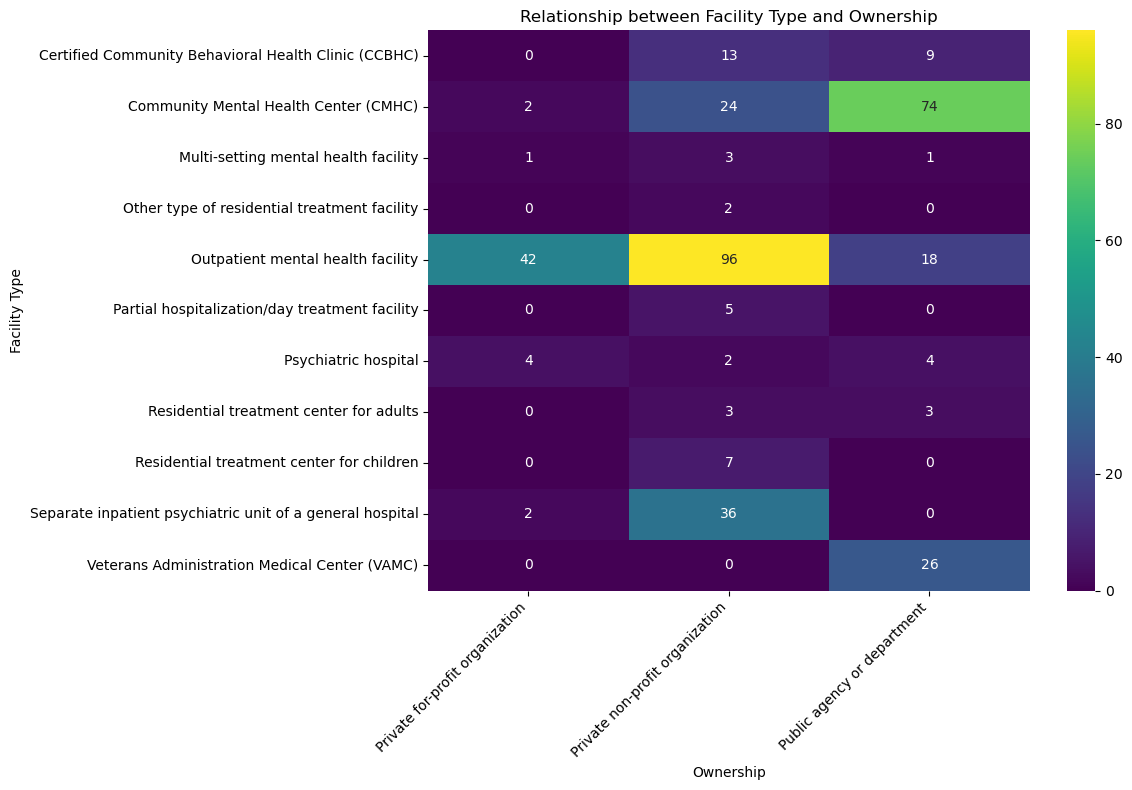

In [102]:
# Mental health facilities in Michigan
cross_tab = pd.crosstab(miFacilities_copy['OWNERSHP'], miFacilities_copy['FACILITYTYPE'])

# Transpose the cross-tabulation
cross_tab_transposed = cross_tab.transpose()

# Set the figure size
plt.figure(figsize=(12, 8))
# Create the heatmap
sns.heatmap(cross_tab_transposed, cmap='viridis', annot=True, fmt='d')
# Set the title and labels
plt.title('Relationship between Facility Type and Ownership')
plt.xlabel('Ownership')
plt.ylabel('Facility Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# display(cross_tab_transposed)


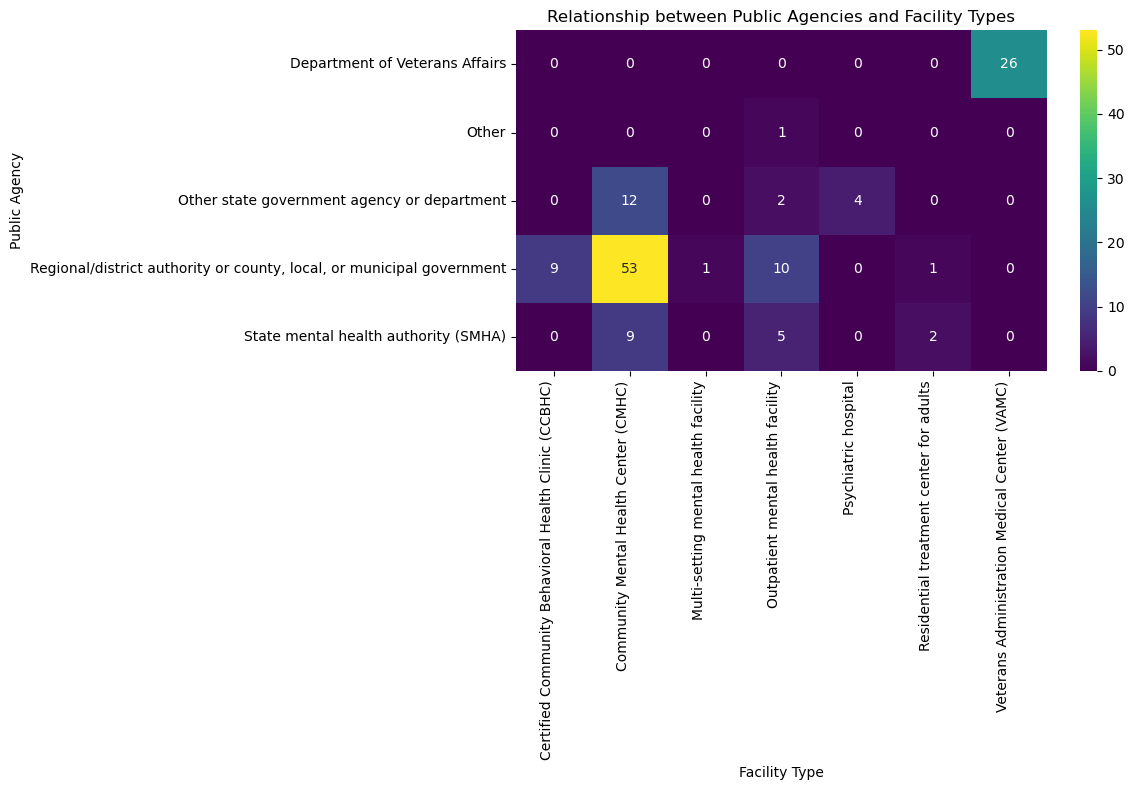

In [103]:


# Further analysis of different public agencies that facilitated mental health facilities
publicagency_count = miFacilities_copy['PUBLICAGENCY'].value_counts(ascending=True)

# Excluding 'logical skip' from the visualization
publicagency_count = publicagency_count.drop('Logical skip', errors='ignore')

# Create a cross-tabulation of 'publicagency' and 'facilitytype' excluding 'logical skip'
cross_tab = pd.crosstab(miFacilities_copy[miFacilities_copy['PUBLICAGENCY'] != 'Logical skip']['PUBLICAGENCY'],
                        miFacilities_copy['FACILITYTYPE'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d')

# Set the title and labels
plt.title('Relationship between Public Agencies and Facility Types')
plt.xlabel('Facility Type')
plt.ylabel('Public Agency')

# Rotate x-axis labels if needed
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [104]:
# Treatment mappings
facilities_mappings = {
    'REVCHK1': {0: 'No',1: 'Yes',-1:'Missing'},
    'REVCHK2': {0: 'No', 1: 'Yes',-1:'Missing'},
    'REVCHK8': {0: 'No',1: 'Yes',-1:'Missing'},
    'PAYASST': {0: 'No',1: 'Yes',-1:'Missing',-2:'Logical skip'},
    'REVCHK5': {0: 'No',1: 'Yes',-1:'Missing'},
    'REVCHK10': {0: 'No',1:'Yes',-1:'Missing'},
    'FUNDSMHA': {0: 'No',1: 'Yes',-1:'Missing'},
    'FUNDSTATEWELFARE': {0: 'No',1: 'Yes',-1:'Missing'},
    'FUNDSTATEJUV': {0: 'No',1: 'Yes',-1:'Missing'},
    'FUNDSTATEEDUC': {0: 'No',1: 'Yes',-1:'Missing'},
    'FUNDOTHSTATE': {0: 'No', 1: 'Yes',-1:'Missing'}
}

for column, mapping in facilities_mappings.items():
    miFacilities_copy[column]=miFacilities_copy[column].replace(mapping)

In [105]:
# Treatment mappings
treatment_mappings = {
    'TREATPSYCHOTHRPY': {0: 'No',1: 'Yes'},
    'TREATFAMTHRPY': {0: 'No', 1: 'Yes'},
    'TREATGRPTHRPY': {0: 'No',1: 'Yes'},
    'TREATCOGTHRPY': {0: 'No',1: 'Yes'},
    'TREATDIALTHRPY': {0: 'No',1: 'Yes'},
    'TREATCOGREM': {0: 'No',1:'Yes'},
    'TREATBEHAVMOD': {0: 'No',1: 'Yes'},
    'TREATTRAUMATHRPY': {0: 'No',1: 'Yes'},
    'TREATACTVTYTHRPY': {0: 'No',1: 'Yes'},
    'TREATELECTRO': {0: 'No',1: 'Yes'},
    'TREATTELEMEDINCE': {0: 'No',1: 'Yes'},
    'TREATOTH': {0: 'No', 1: 'Yes'},
    'ANTIPSYCH': {0: 'No', 1: 'Yes', -1: 'Missing'}
}

for column, mapping in treatment_mappings.items():
    miFacilities_copy[column]=miFacilities_copy[column].replace(mapping)

In [106]:

# Define an empty list to store the results
top_treatments_per_facility = []

# Define the list of treatment options
treatment_options = ['TREATPSYCHOTHRPY', 'TREATFAMTHRPY', 'TREATGRPTHRPY', 'TREATCOGTHRPY',
                     'TREATBEHAVMOD', 'TREATTRAUMATHRPY', 'TREATTELEMEDINCE']

# Define a dictionary to map treatment options to descriptions
treatment_descriptions = {
    'TREATPSYCHOTHRPY': 'Psychotherapy',
    'TREATFAMTHRPY': 'Family Therapy',
    'TREATGRPTHRPY': 'Group Therapy',
    'TREATCOGTHRPY': 'Cognitive Therapy',
    'TREATBEHAVMOD': 'Behavioral Modification',
    'TREATTRAUMATHRPY': 'Trauma Therapy',
    'TREATTELEMEDINCE': 'Telemedicine Therapy'
}

# Loop through each facility type
for facility_type in miFacilities_copy['FACILITYTYPE'].unique():
    # Filter the DataFrame to include only facilities of the current type
    facility_df = miFacilities_copy[miFacilities_copy['FACILITYTYPE'] == facility_type]
    
    # Initialize a list to store the treatment options
    top_treatments = []
    
    # Loop through each treatment option
    for treatment in treatment_options:
        # Check if the treatment is offered by any facility of the current type
        if (facility_df[treatment] == 'Yes').any():
            # Append the treatment description to the list
            top_treatments.append(treatment_descriptions[treatment])
    
    # If there are more than two treatments, keep only the top two
    if len(top_treatments) > 2:
        top_treatments = top_treatments[:2]
    
    # Append the facility type and top treatments to the results list
    top_treatments_per_facility.append({'Facility Type': facility_type, 
                                         'Top Treatment 1': top_treatments[0] if len(top_treatments) > 0 else None,
                                         'Top Treatment 2': top_treatments[1] if len(top_treatments) > 1 else None})

# Convert the list of results into a DataFrame
top_treatments_df = pd.DataFrame(top_treatments_per_facility)

# Display the top treatments per facility as a table
display(top_treatments_df)


,Facility Type,Top Treatment 1,Top Treatment 2
0,Residential treatment center for adults,Psychotherapy,Group Therapy
1,Community Mental Health Center (CMHC),Psychotherapy,Family Therapy
2,Separate inpatient psychiatric unit of a gener...,Psychotherapy,Family Therapy
3,Veterans Administration Medical Center (VAMC),Psychotherapy,Family Therapy
4,Outpatient mental health facility,Psychotherapy,Family Therapy
5,Residential treatment center for children,Psychotherapy,Family Therapy
6,Certified Community Behavioral Health Clinic (...,Psychotherapy,Family Therapy
7,Multi-setting mental health facility,Psychotherapy,Family Therapy
8,Partial hospitalization/day treatment facility,Psychotherapy,Family Therapy
9,Psychiatric hospital,Psychotherapy,Family Therapy


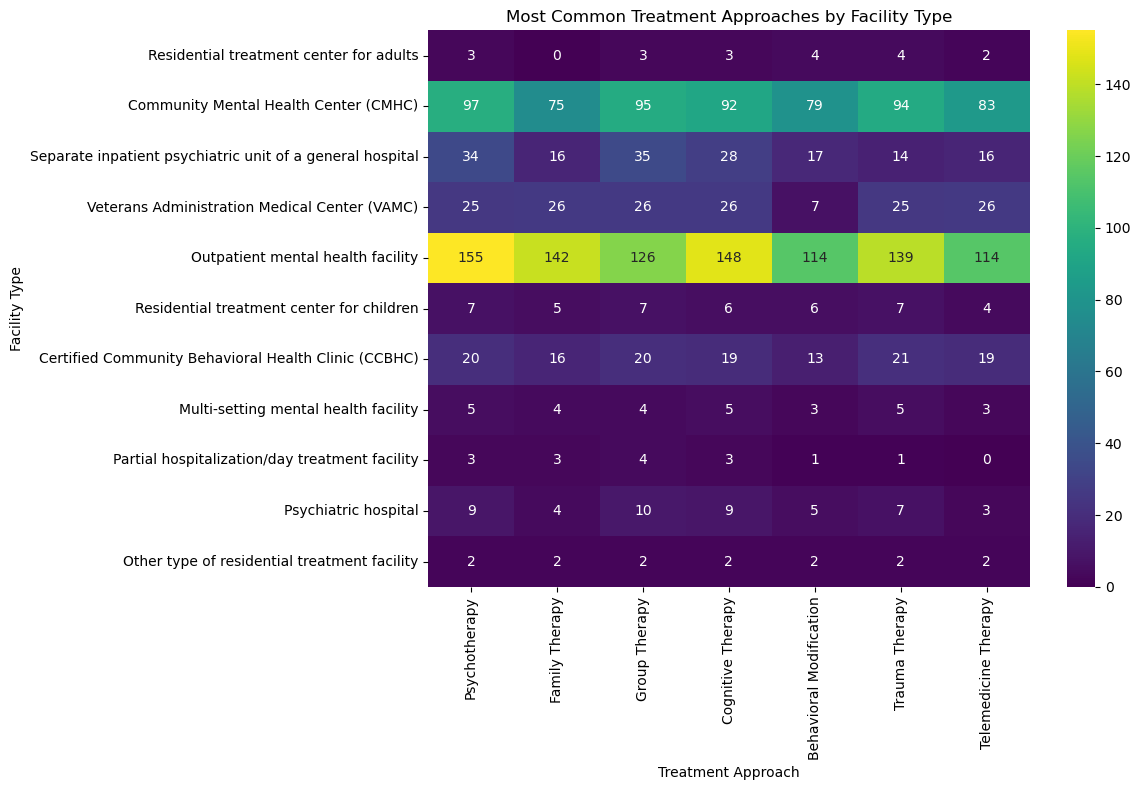

,Psychotherapy,Family Therapy,Group Therapy,Cognitive Therapy,Behavioral Modification,Trauma Therapy,Telemedicine Therapy
Residential treatment center for adults,3,0,3,3,4,4,2
Community Mental Health Center (CMHC),97,75,95,92,79,94,83
Separate inpatient psychiatric unit of a general hospital,34,16,35,28,17,14,16
Veterans Administration Medical Center (VAMC),25,26,26,26,7,25,26
Outpatient mental health facility,155,142,126,148,114,139,114
Residential treatment center for children,7,5,7,6,6,7,4
Certified Community Behavioral Health Clinic (CCBHC),20,16,20,19,13,21,19
Multi-setting mental health facility,5,4,4,5,3,5,3
Partial hospitalization/day treatment facility,3,3,4,3,1,1,0
Psychiatric hospital,9,4,10,9,5,7,3


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make an understanding of the box plot
treatment_options = ['TREATPSYCHOTHRPY', 'TREATFAMTHRPY', 'TREATGRPTHRPY', 'TREATCOGTHRPY',
                     'TREATBEHAVMOD', 'TREATTRAUMATHRPY', 'TREATTELEMEDINCE']

# Define a dictionary to map treatment options to descriptions
treatment_descriptions = {
    'TREATPSYCHOTHRPY': 'Psychotherapy',
    'TREATFAMTHRPY': 'Family Therapy',
    'TREATGRPTHRPY': 'Group Therapy',
    'TREATCOGTHRPY': 'Cognitive Therapy',
    'TREATBEHAVMOD': 'Behavioral Modification',
    'TREATTRAUMATHRPY': 'Trauma Therapy',
    'TREATTELEMEDINCE': 'Telemedicine Therapy'
}

# Create a DataFrame to store the data for plotting
data_for_plot = []

# Loop through each facility type
for facility_type in miFacilities_copy['FACILITYTYPE'].unique():
    facility_df = miFacilities_copy[miFacilities_copy['FACILITYTYPE'] == facility_type]
    
    treatment_counts = {}
    
    # Loop through each treatment option
    for treatment in treatment_options:
        # Count the occurrences of the treatment for the current facility type
        count = (facility_df[treatment] == 'Yes').sum()
        treatment_counts[treatment_descriptions[treatment]] = count
    
    # Append the data to the list for visualization
    data_for_plot.append(treatment_counts)

# Convert the list of data to a DataFrame
data_df = pd.DataFrame(data_for_plot, index=miFacilities_copy['FACILITYTYPE'].unique())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_df, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Treatment Approach')
plt.ylabel('Facility Type')
plt.title('Most Common Treatment Approaches by Facility Type')
plt.tight_layout()
plt.show()

display(data_df)

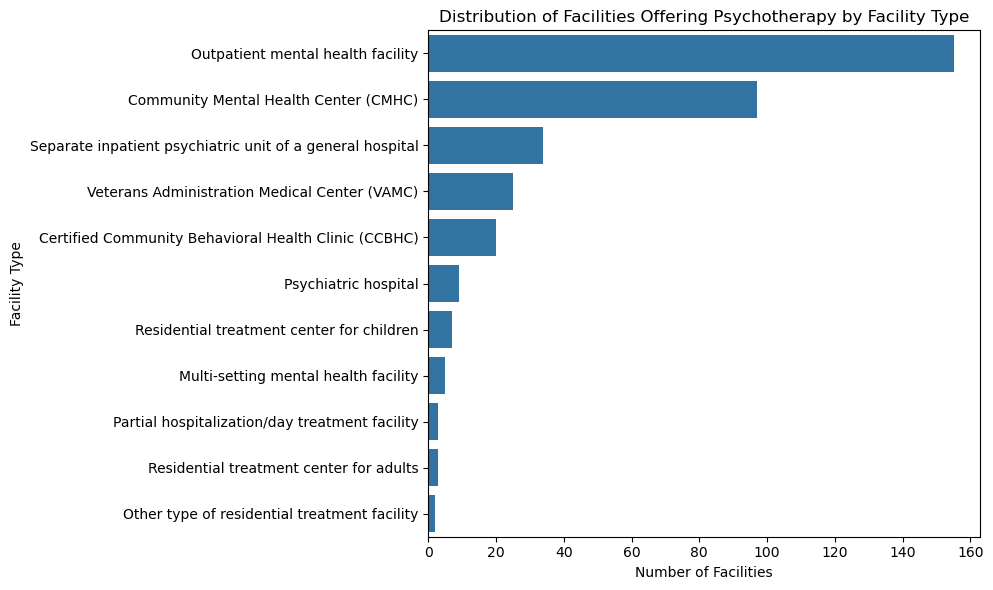

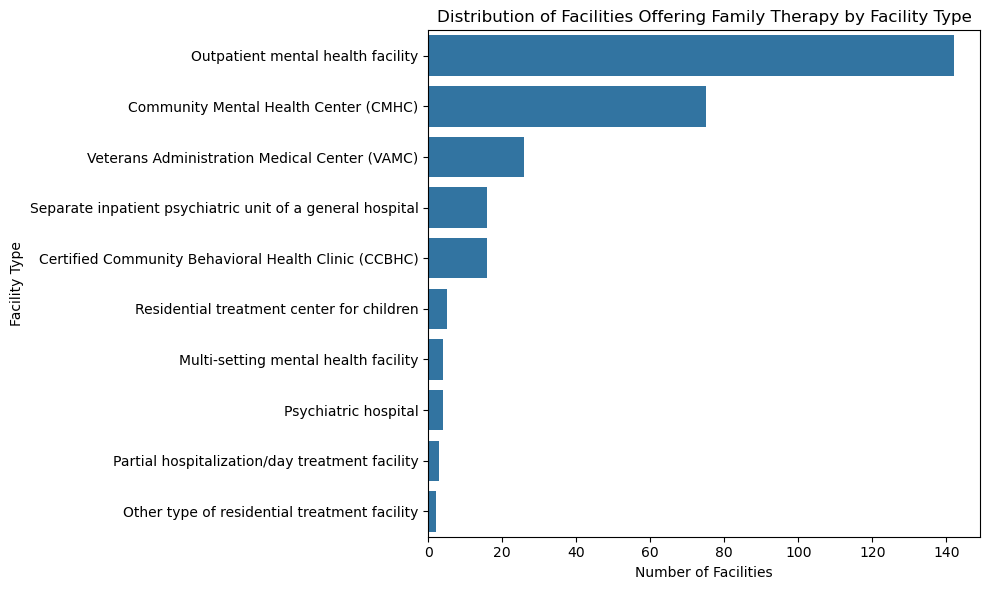

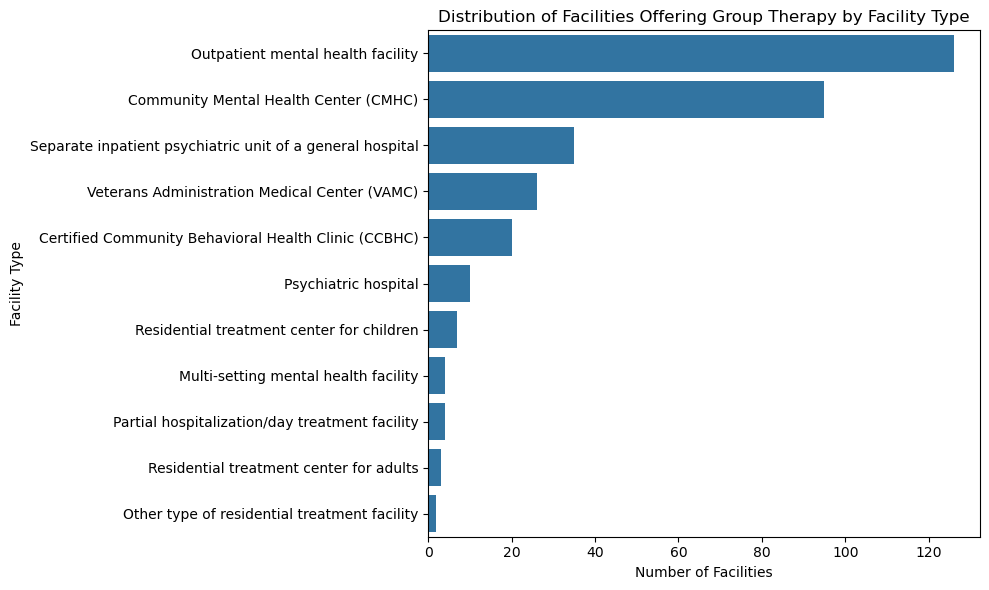

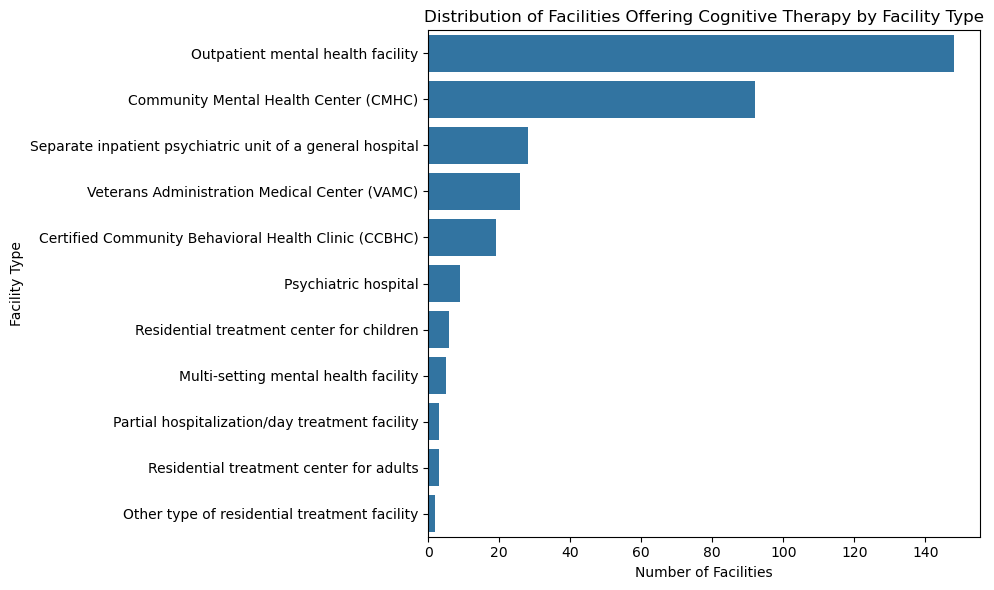

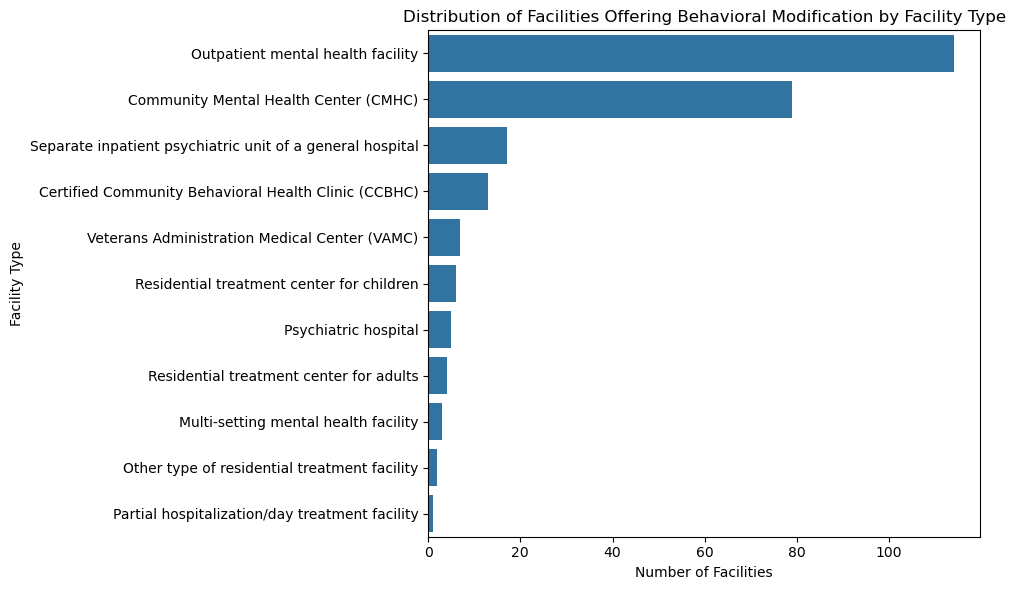

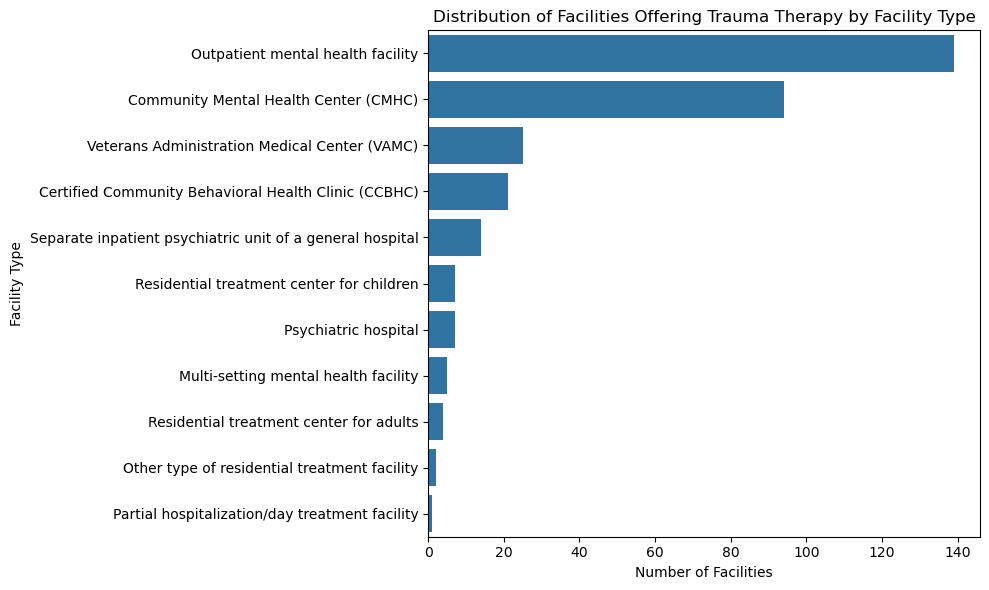

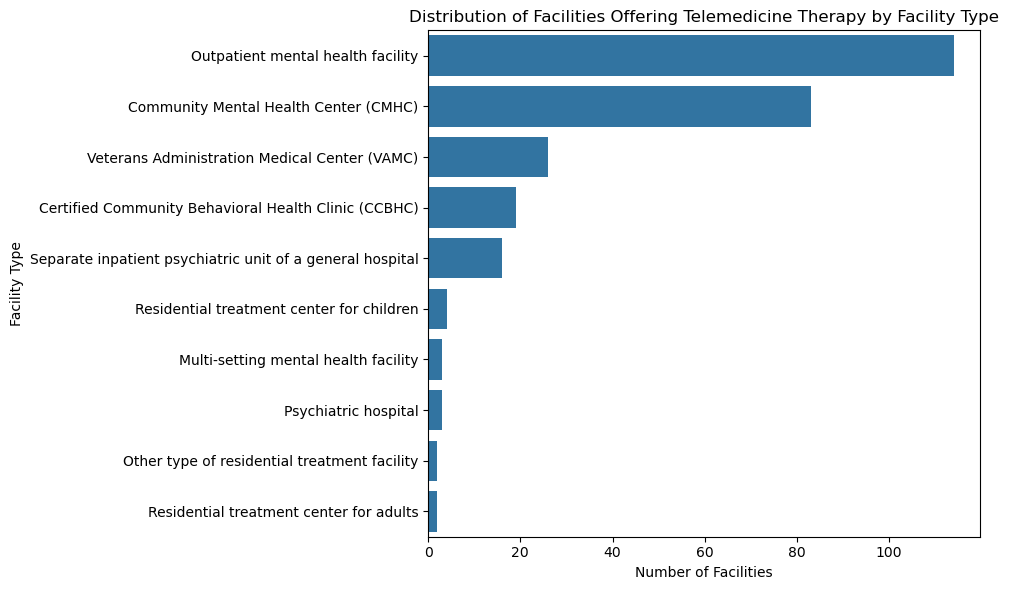

In [108]:
#Grouping treatment approaches per different facilities

# Define the list of treatment options
treatment_options = ['TREATPSYCHOTHRPY', 'TREATFAMTHRPY', 'TREATGRPTHRPY', 'TREATCOGTHRPY',
                     'TREATBEHAVMOD', 'TREATTRAUMATHRPY', 'TREATTELEMEDINCE']
# Define a dictionary to map treatment options to descriptions
treatment_descriptions = {
    'TREATPSYCHOTHRPY': 'Psychotherapy',
    'TREATFAMTHRPY': 'Family Therapy',
    'TREATGRPTHRPY': 'Group Therapy',
    'TREATCOGTHRPY': 'Cognitive Therapy',
    'TREATBEHAVMOD': 'Behavioral Modification',
    'TREATTRAUMATHRPY': 'Trauma Therapy',
    'TREATTELEMEDINCE': 'Telemedicine Therapy'
}
# Loop through each treatment option
for treatment in treatment_options:
    # Filter the DataFrame to include only facilities that offer the current treatment
    treatment_facilities = miFacilities_copy[miFacilities_copy[treatment] == 'Yes']
    
    # Count the number of facilities by facility type
    treatment_facilities_count = treatment_facilities['FACILITYTYPE'].value_counts()
    
    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=treatment_facilities_count.values, y=treatment_facilities_count.index, orient='h')
    plt.title(f'Distribution of Facilities Offering {treatment_descriptions[treatment]} by Facility Type')
    plt.xlabel('Number of Facilities')
    plt.ylabel('Facility Type')
    plt.tight_layout()
    plt.show()



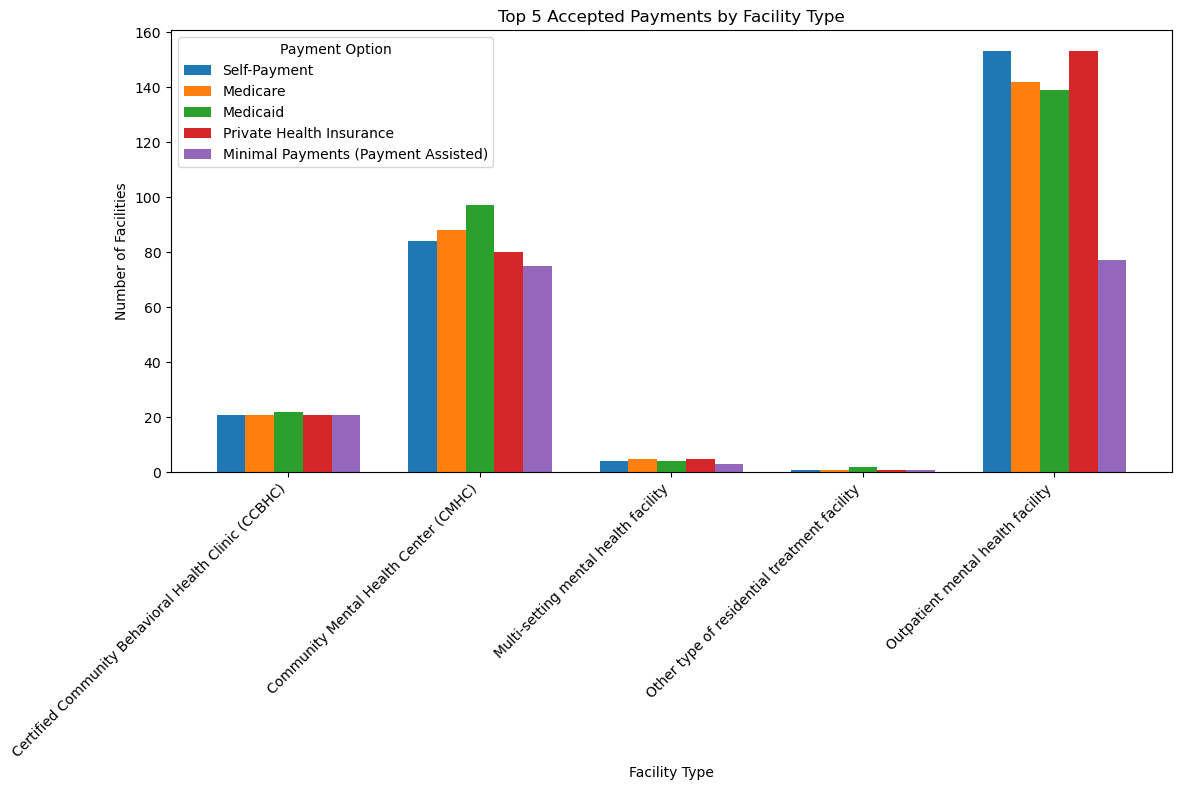

In [109]:

# Convert the index of top_5_payments DataFrame to a list
facility_types = top_5_payments.index.tolist()

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r = np.arange(len(facility_types))

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each payment option and plot a grouped bar for each facility type
for i, payment_option in enumerate(top_5_payments.columns):
    plt.bar(r + i * bar_width, top_5_payments[payment_option], color='C' + str(i), width=bar_width, label=payment_option)

# Add labels and title
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.title('Top 5 Accepted Payments by Facility Type')
plt.xticks(r + bar_width * 2, facility_types, rotation=45, ha='right')
plt.legend(title='Payment Option')

# Show the plot
plt.tight_layout()
plt.show()


In [110]:
import pandas as pd

# Extract the data used for plotting
data = {
    'Facility Type': facility_types
}

# Add columns for each payment option
for payment_option in top_5_payments.columns:
    data[payment_option] = top_5_payments[payment_option].tolist()

# Create a DataFrame from the data
table_df = pd.DataFrame(data)

# Display the DataFrame
print(table_df)


                                       Facility Type  Self-Payment  Medicare  \
0  Certified Community Behavioral Health Clinic (...            21      21.0   
1              Community Mental Health Center (CMHC)            84      88.0   
2               Multi-setting mental health facility             4       5.0   
3       Other type of residential treatment facility             1       1.0   
4                  Outpatient mental health facility           153     142.0   

   Medicaid  Private Health Insurance  Minimal Payments (Payment Assisted)  
0        22                        21                                 21.0  
1        97                        80                                 75.0  
2         4                         5                                  3.0  
3         2                         1                                  1.0  
4       139                       153                                 77.0  


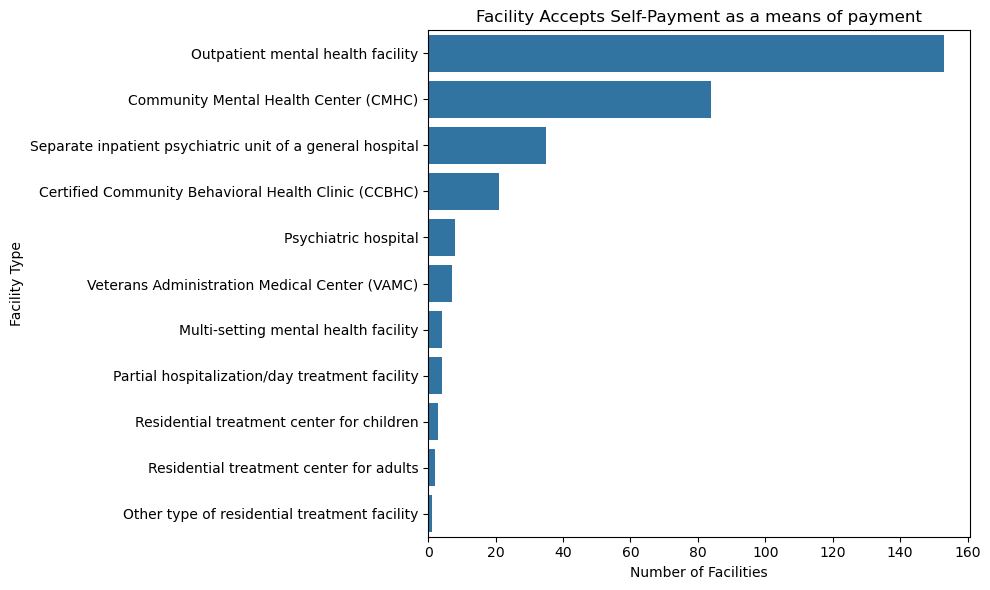

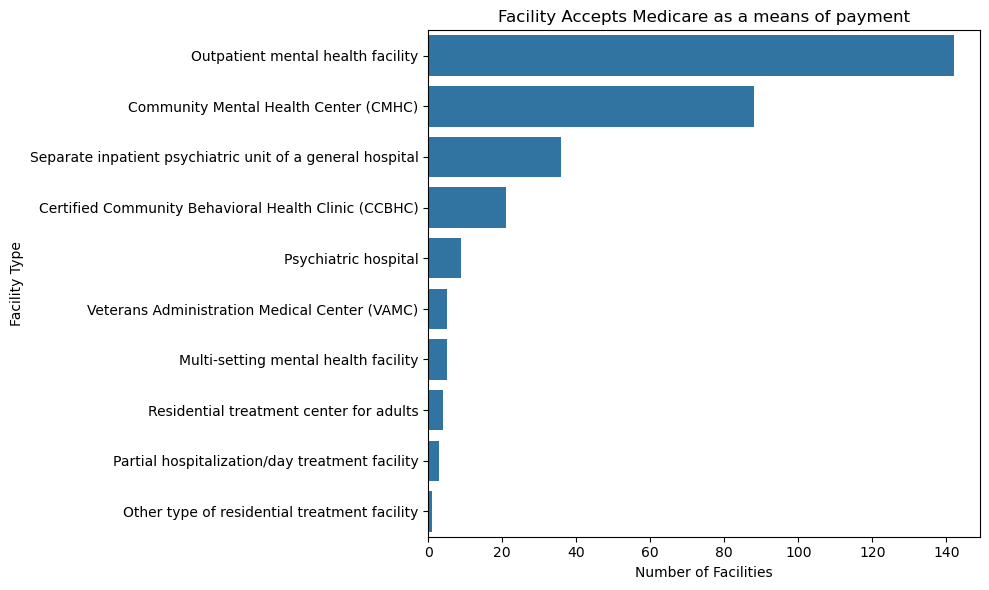

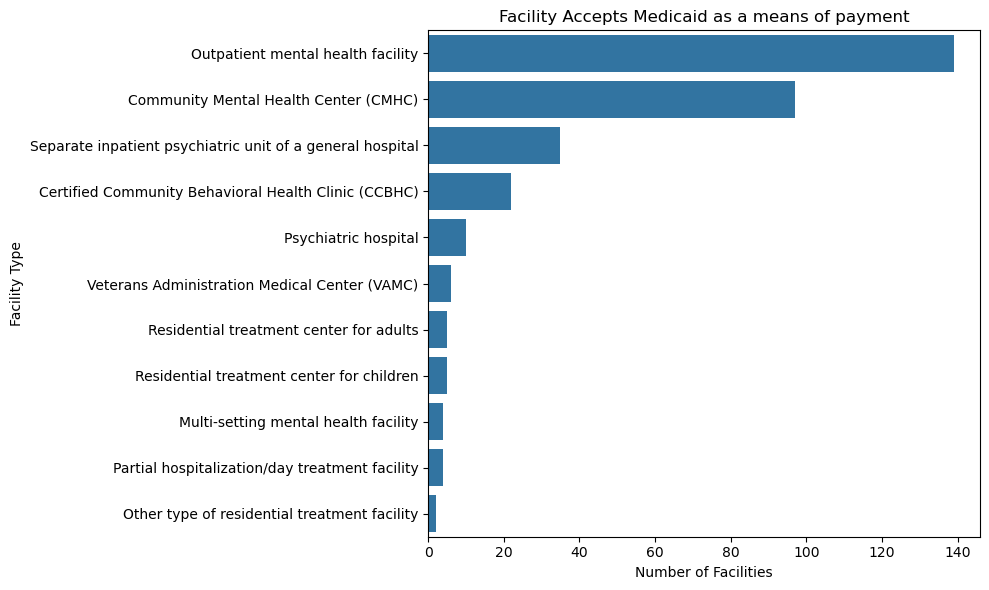

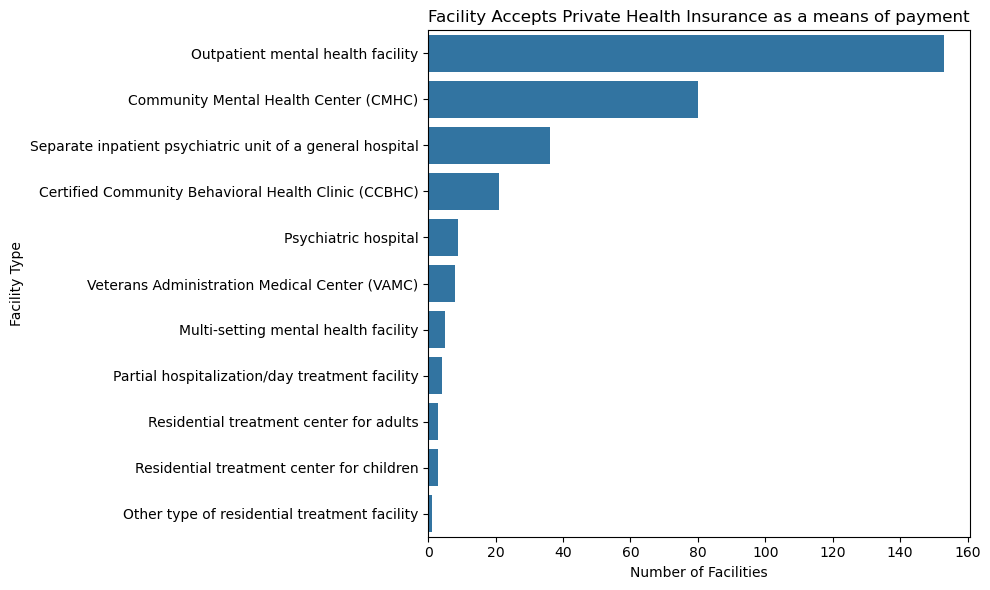

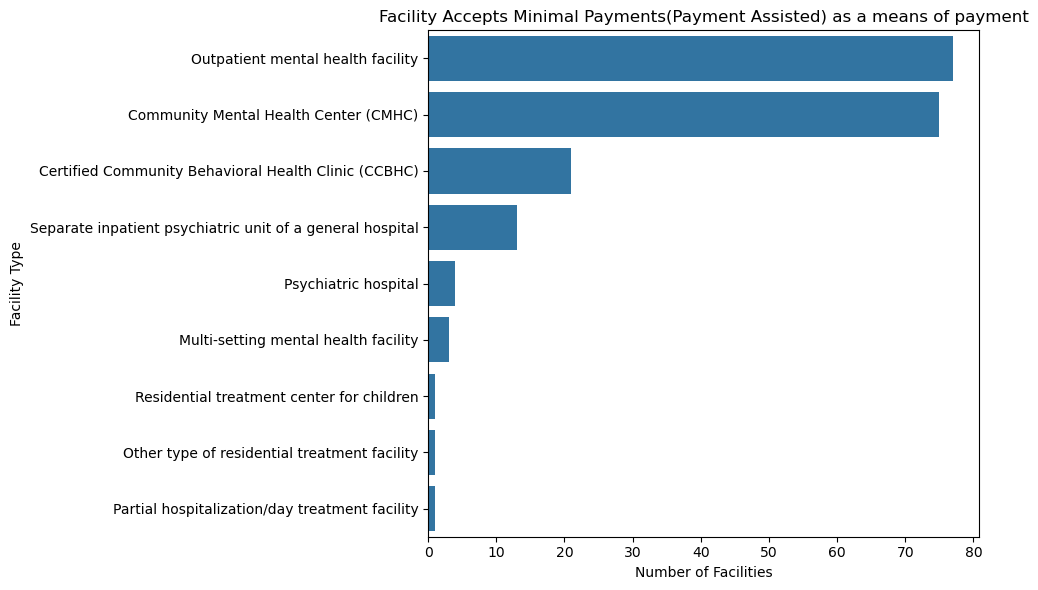

In [111]:
# Grouping by payment types per facility

payment_options = ['REVCHK1', 'REVCHK8', 'REVCHK5', 'REVCHK2',
                     'PAYASST']
payment_descriptions = {
    'REVCHK1': 'Self-Payment',
    'REVCHK8': 'Medicare',
    'REVCHK5': 'Medicaid',
    'REVCHK2': 'Private Health Insurance',
    'PAYASST': 'Minimal Payments(Payment Assisted)'
}
# Loop through each treatment option
for payment in payment_options:
    # Filter the DataFrame to include only facilities that offer the current treatment
    payment_facilities = miFacilities_copy[miFacilities_copy[payment] == 'Yes']
    
    # Count the number of facilities by facility type
    payment_facilities_count = payment_facilities['FACILITYTYPE'].value_counts()
    
    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_facilities_count.values, y=payment_facilities_count.index, orient='h')
    plt.title(f'Facility Accepts {payment_descriptions[payment]} as a means of payment')
    plt.xlabel('Number of Facilities')
    plt.ylabel('Facility Type')
    plt.tight_layout()
    plt.show()


In [112]:
# Geolocation of facilities
distribution.head()

,FacilityTypeCode,FacilityType,Name,City,State,Zip,County,Latitude,Longitude
0,1080,Psychiatric Hospital/Unit,MyMichigan Medical Center Alpena,Alpena,MI,49707,Alpena,45.077728,-83.448692
1,1080,Psychiatric Hospital/Unit,McLaren Bay Region,Bay City,MI,48708,Bay,43.589272,-83.869034
2,1080,Psychiatric Hospital/Unit,Corewell Health Lakeland Hospitals St Joseph H...,St Joseph,MI,49085,Berrien,42.088596,-86.478584
3,1080,Psychiatric Hospital/Unit,PROMEDICA COLDWATER REGIONAL HOSPITAL,Coldwater,MI,49036,Branch,41.938839,-84.990005
4,1080,Psychiatric Hospital/Unit,Bronson Behavioral Health Hospital,Battle Creek,MI,49015,Calhoun,42.252605,-85.191704


In [113]:
# map_data = distribution[['FacilityType','State','Zip','County','Latitude','Longitude']]
# map_data.head()

In [114]:
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
response = requests.get(geojson_url)
geojson = response.json()
# geojson

In [115]:

map_data = distribution[(distribution['State'] == 'MI') & (distribution['FacilityType'] == 'Psychiatric Hospital/Unit')]


In [116]:
# import folium
M = folium.Map(location=[44.18, -90.50], zoom_start=7)

for idx, row in map_data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Name']).add_to(M)

M

In [117]:
from tabulate import tabulate

# Count the occurrences of each facility type across all treatment options
facility_type_counts = miFacilities_copy['FACILITYTYPE'].value_counts()

# Convert the counts to a list of lists
data = [[facility_type, count] for facility_type, count in facility_type_counts.items()]

# Column headers
headers = ["Facility Type", "Count"]

# Generate the table
table = tabulate(data, headers=headers, tablefmt="pretty")

# Print the table
print(table)


+-----------------------------------------------------------+-------+
|                       Facility Type                       | Count |
+-----------------------------------------------------------+-------+
|             Outpatient mental health facility             |  156  |
|           Community Mental Health Center (CMHC)           |  100  |
| Separate inpatient psychiatric unit of a general hospital |  38   |
|       Veterans Administration Medical Center (VAMC)       |  26   |
|   Certified Community Behavioral Health Clinic (CCBHC)    |  22   |
|                   Psychiatric hospital                    |  10   |
|         Residential treatment center for children         |   7   |
|          Residential treatment center for adults          |   6   |
|           Multi-setting mental health facility            |   5   |
|      Partial hospitalization/day treatment facility       |   5   |
|       Other type of residential treatment facility        |   2   |
+-------------------